In [7]:
import pandas as pd
df = pd.read_csv('all-teams-nice.csv')

In [8]:
len(df)

205126

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df_nona = df.dropna()
df_nona

,id,puzzle-games,puzzle-rating,puzzle-rd,blitz-games,blitz-rating,blitz-rd,rapid-games,rapid-rating,rapid-rd,storm-runs,storm-score
1,ian_fidelino,326.0,2447.0,146.0,1282,2297,45,164,2332,55,1.0,35.0
7,bumblezz,1007.0,1907.0,61.0,110,1254,45,419,1289,46,60.0,24.0
14,coymagician171,1804.0,1705.0,76.0,106,1199,46,392,1297,52,15.0,17.0
16,sohil_526,3289.0,1511.0,63.0,411,1090,48,533,1213,46,30.0,24.0
18,alan70,67.0,1953.0,91.0,64,1344,57,5,1543,225,7.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
205116,dominikanisch,31881.0,1847.0,73.0,2223,2096,50,337,2098,60,1.0,43.0
205117,voechr,4553.0,2180.0,66.0,3567,1973,45,72,2115,66,141.0,51.0
205120,jonny-strong,264.0,1964.0,73.0,136,1762,87,115,1800,83,5.0,29.0
205121,dustin1304,2243.0,1535.0,61.0,33,905,100,229,1320,46,30.0,20.0


In [13]:
prune = df_nona[(df_nona['blitz-rd']<100)&(df_nona['puzzle-rd']<100)&
                        (df_nona['rapid-rd']<100)&(df_nona['storm-runs']>5)]
prune

,id,puzzle-games,puzzle-rating,puzzle-rd,blitz-games,blitz-rating,blitz-rd,rapid-games,rapid-rating,rapid-rd,storm-runs,storm-score
7,bumblezz,1007.0,1907.0,61.0,110,1254,45,419,1289,46,60.0,24.0
14,coymagician171,1804.0,1705.0,76.0,106,1199,46,392,1297,52,15.0,17.0
16,sohil_526,3289.0,1511.0,63.0,411,1090,48,533,1213,46,30.0,24.0
20,sadecedenedim,44.0,2206.0,90.0,27,1620,88,24,2103,86,30.0,39.0
31,i-sac,1224.0,2257.0,63.0,2152,1662,45,466,1827,48,6.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
205093,leopold2003,698.0,2038.0,61.0,530,1687,45,201,1789,59,49.0,31.0
205094,masterion2,11209.0,2036.0,64.0,1386,1771,46,348,1927,53,140.0,46.0
205095,lordnyrob,3580.0,2391.0,63.0,531,1789,48,102,1823,52,617.0,45.0
205117,voechr,4553.0,2180.0,66.0,3567,1973,45,72,2115,66,141.0,51.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='puzzle-rating', ylabel='blitz-rating'>

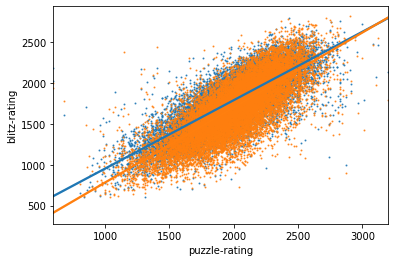

In [16]:
sns.regplot(data=prune,x='puzzle-rating',y='rapid-rating',scatter_kws={"s": 1})
sns.regplot(data=prune,x='puzzle-rating',y='blitz-rating',scatter_kws={"s": 1})

<AxesSubplot:xlabel='storm-score', ylabel='blitz-rating'>

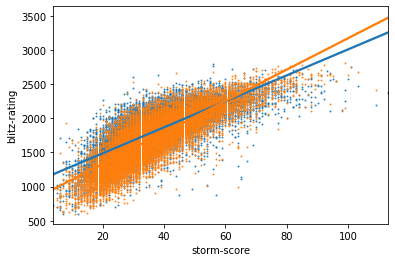

In [20]:
sns.regplot(data=prune,x='storm-score',y='rapid-rating',scatter_kws={"s": 1})
sns.regplot(data=prune,x='storm-score',y='blitz-rating',scatter_kws={"s": 1}) #orange

In [21]:
df.to_csv('allteams-nice-NI.csv',index=False)

In [22]:
qprune = prune[['puzzle-rating','rapid-rating','blitz-rating','storm-score']]
qprune.columns = ['puzzle','rapid','blitz','storm']
qprune

,puzzle,rapid,blitz,storm
7,1907.0,1289,1254,24.0
14,1705.0,1297,1199,17.0
16,1511.0,1213,1090,24.0
20,2206.0,2103,1620,39.0
31,2257.0,1827,1662,29.0
...,...,...,...,...
205093,2038.0,1789,1687,31.0
205094,2036.0,1927,1771,46.0
205095,2391.0,1823,1789,45.0
205117,2180.0,2115,1973,51.0


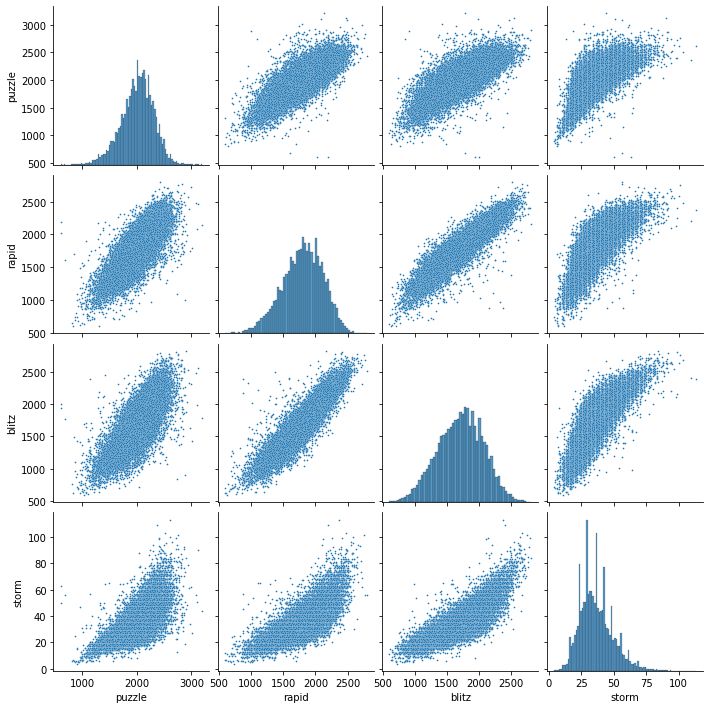

In [26]:
sns.pairplot(qprune,plot_kws={"s": 3})